In [85]:
# libraries 

import sys
sys.path.insert(0, '..')
import pickle


# data stuff
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import branca.colormap as cm
from folium.plugins import MarkerCluster



# preproc
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from PythonScripts.plotting import plotting
from sklearn.inspection import plot_partial_dependence



# stats
from scipy.stats import kurtosis, skew
from sklearn.utils import resample
import scipy


# evaluation
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV




# modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from PythonScripts.nn import cross_validate, plot_histories

from time import time



In [12]:
path = '../data/Boston_Housing_Market_Challenge/boston_clusters.csv'

df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,TOWN,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Clusters
0,0,178,Arlington,29,3567,-77.098798,38.872313,29.9,29.9,0.06642,...,0.51,6.860,74.4,2.9153,5,296,16.6,391.27,6.92,0
1,1,177,Arlington,29,3566,-77.097298,38.875713,24.6,24.6,0.05425,...,0.51,6.315,73.4,3.3175,5,296,16.6,395.60,6.29,0
2,2,176,Arlington,29,3565,-77.095098,38.878213,23.2,23.2,0.07022,...,0.51,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,0
3,3,175,Arlington,29,3564,-77.105798,38.888213,29.4,29.4,0.06664,...,0.51,6.546,33.1,3.1323,5,296,16.6,390.96,5.33,0
4,4,174,Arlington,29,3563,-77.124298,38.885713,22.6,22.6,0.08447,...,0.51,5.859,68.7,2.7019,5,296,16.6,393.23,9.64,0


In [21]:
X_cols = [ 'CRIM', 'INDUS', 'AGE', 'DIS', 'RAD']
y_col = ['NOX']

X = df[X_cols]
y = df[y_col]




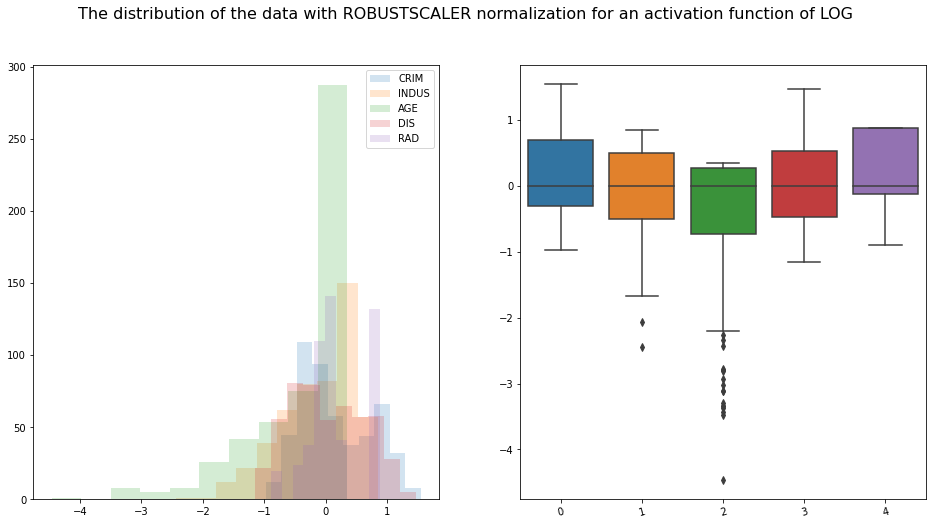

In [22]:
X, kurts, skews = plotting(X, activation = log, normalization = RobustScaler)


# create dataframes for each cluster
dfs = [X[df.Clusters == cluster] for cluster in np.unique(df.Clusters)]

In [23]:
# load regression model
start_path = '../data/models/'
models = ['SVR.pkl', 'LR.pkl', 'Ridge.pkl']

act_models = [pickle.load(open(start_path + name, 'rb')) for name in models]

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-31-a5942935f2cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

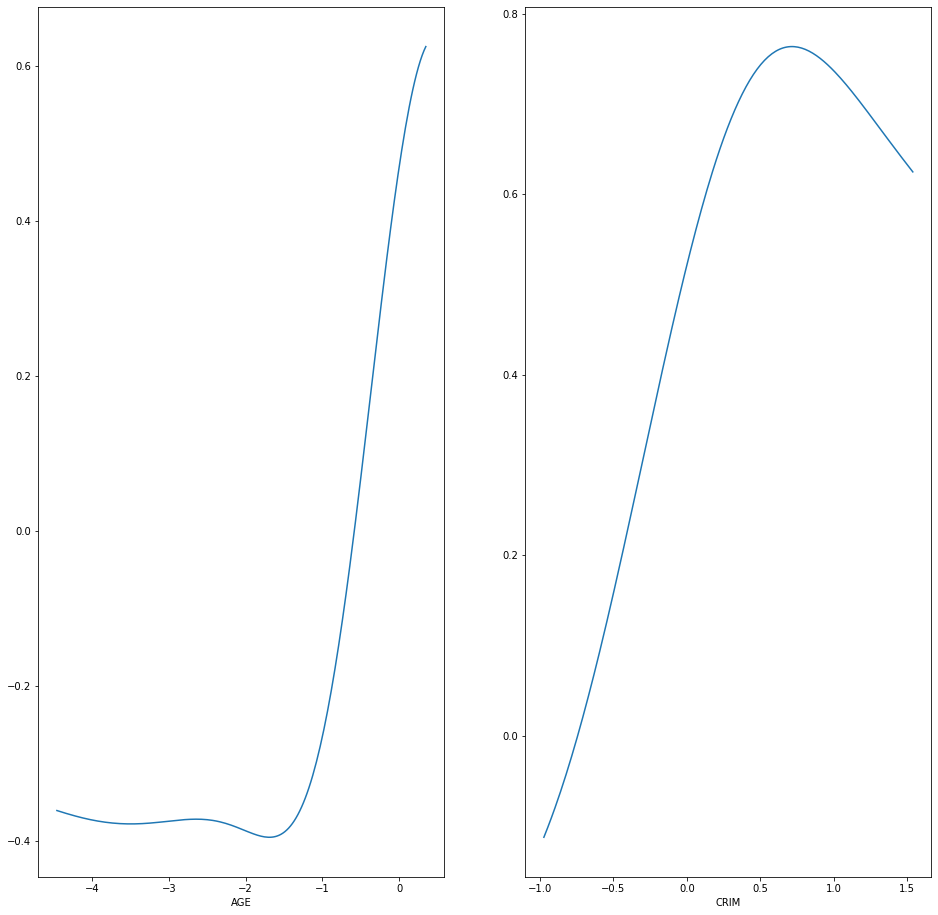

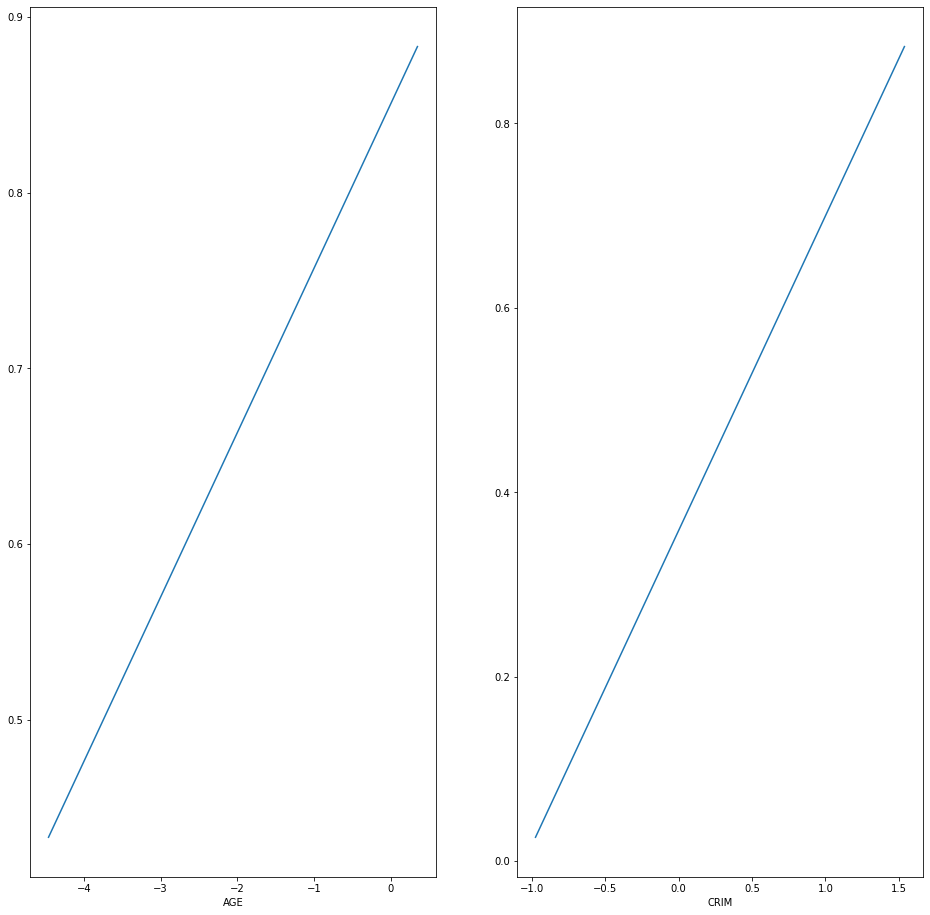

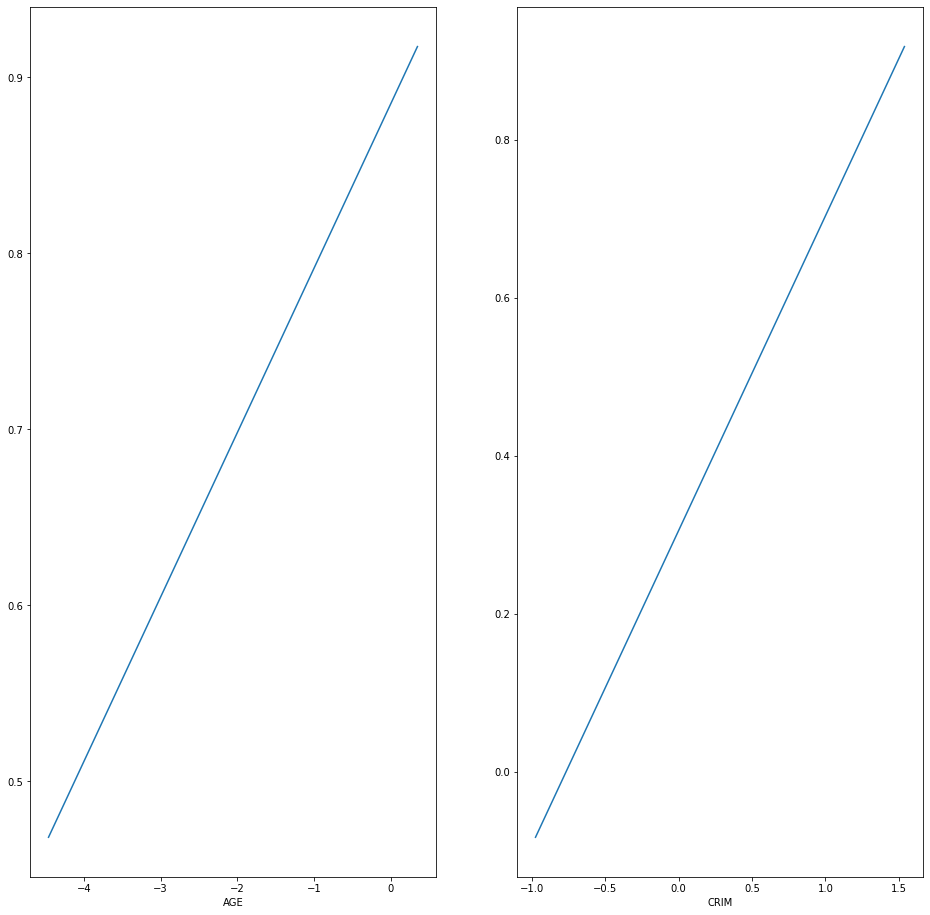

In [31]:
for name in models:
    model = pickle.load(open(start_path + name, 'rb'))
    change_vars = ['AGE', 'CRIM']

    low = 1
    med = 2
    high = 0
    
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,16))
    i = 0
    for ax, change_var in zip(axes, change_vars):
        var_range = np.linspace(X[change_var].min(), X[change_var].max(), 200)
        predictions = []
        for var in var_range:
            df_temp = dfs[low]
            df_temp[change_var] = var
            y_hat = model.predict(df_temp)
            y_hat_avg = y_hat.mean()
            predictions.append(y_hat_avg)
        ax.plot(var_range, predictions)
        ax.set_xlabel(change_var)


/Users/yousefnami/opt/anaconda3/envs/ai_hack_2021/lib/python3.8/site-packages/sklearn/inspection/_plot/partial_dependence.py:732: UserWarning: Attempting to set identical bottom == top == 0.6247368804541704 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
/Users/yousefnami/opt/anaconda3/envs/ai_hack_2021/lib/python3.8/site-packages/sklearn/inspection/_plot/partial_dependence.py:732: UserWarning: Attempting to set identical bottom == top == 0.6247368804541704 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
/Users/yousefnami/opt/anaconda3/envs/ai_hack_2021/lib/python3.8/site-packages/sklearn/inspection/_plot/partial_dependence.py:732: UserWarning: Attempting to set identical bottom == top == 0.8832475374819827 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
/Users/yousefnami/opt/anaconda3/envs/ai_hack_2021/lib/python3.8/site-packages/sklearn/inspection/_pl

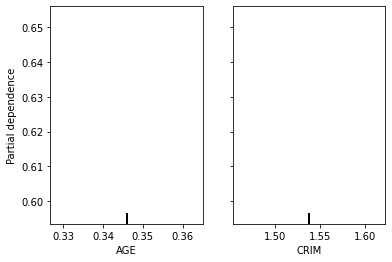

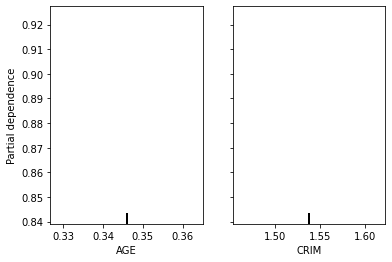

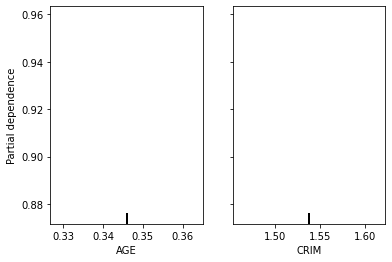

In [38]:
for name in models:
    model = pickle.load(open(start_path + name, 'rb'))
    # not sure why wrong?
    plot_partial_dependence(model, dfs[1], features = ['AGE', 'CRIM'])

In [61]:
boot_strapped = resample(dfs[high], n_samples = dfs[low].shape[0]).reset_index()

In [94]:
developed = dfs[low].copy().reset_index()

developed[[col for col in dfs[0].columns if col not in ['INDUS', 'RAD', 'DIS']]] = \
boot_strapped[[col for col in dfs[0].columns if col not in ['INDUS', 'RAD', 'DIS']]]

In [95]:
dfs[low]['LON'] = df.LON.iloc[dfs[low].index]
dfs[low]['LAT'] = df.LAT.iloc[dfs[low].index]
dfs[low]

<ipython-input-95-cf009f7e6056>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[low]['LON'] = df.LON.iloc[dfs[low].index]
<ipython-input-95-cf009f7e6056>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[low]['LAT'] = df.LAT.iloc[dfs[low].index]


,CRIM,INDUS,AGE,DIS,RAD,LON,LAT
29,1.538158,0.500183,0.345914,-0.456689,0.875461,-71.134686,42.346891
31,1.538158,0.500183,0.345914,-0.576250,0.875461,-71.125186,42.351591
42,1.538158,0.500183,0.345914,-0.903697,0.875461,-71.057796,42.375740
43,1.538158,0.500183,0.345914,-0.927685,0.875461,-71.055096,42.377740
44,1.538158,0.500183,0.345914,-0.984818,0.875461,-71.059096,42.378240
...,...,...,...,...,...,...,...
433,1.538158,0.652377,0.345914,-0.533434,-0.124539,-71.096223,42.379783
435,1.538158,0.652377,0.345914,-0.288922,-0.124539,-71.086023,42.383483
436,1.538158,0.652377,0.345914,-0.345830,-0.124539,-71.088523,42.378783
456,1.538158,0.071099,0.345914,0.147455,-0.124539,-71.238266,42.370158


In [96]:
developed

,index,CRIM,INDUS,AGE,DIS,RAD,LON,LAT
0,29,-0.375509,0.500183,-0.381677,-0.456689,0.875461,-71.134686,42.346891
1,31,-0.352086,0.500183,-2.042905,-0.576250,0.875461,-71.125186,42.351591
2,42,0.181685,0.500183,-0.107453,-0.903697,0.875461,-71.057796,42.375740
3,43,-0.090823,0.500183,-0.482783,-0.927685,0.875461,-71.055096,42.377740
4,44,-0.397387,0.500183,0.145961,-0.984818,0.875461,-71.059096,42.378240
...,...,...,...,...,...,...,...,...
142,433,-0.675599,0.652377,-1.221764,-0.533434,-0.124539,-71.096223,42.379783
143,435,0.371631,0.652377,-1.320017,-0.288922,-0.124539,-71.086023,42.383483
144,436,-0.506489,0.652377,-0.949437,-0.345830,-0.124539,-71.088523,42.378783
145,456,-0.408539,0.071099,-0.073758,0.147455,-0.124539,-71.238266,42.370158


In [97]:
NOX_developed = pickle.load(open(start_path + 'SVR.pkl', 'rb')).predict(developed[X_cols]) 
NOX_original = pickle.load(open(start_path + 'SVR.pkl', 'rb')).predict(dfs[low][X_cols])

In [103]:
m=folium.Map([42.3557, -71.0572],zoom_start=10, tiles="cartodbpositron",)
my_col = ['red','khaki','orange','green']
#marker_cluster = MarkerCluster().add_to(m)

colormap = cm.LinearColormap(colors=['yellow','red'], index=[NOX_original.min(),NOX_original.max()],vmin=NOX_original.min(),vmax=NOX_original.max())

for lat,lon,NOX in zip(developed['LAT'],developed['LON'],NOX_developed):    
    folium.CircleMarker([lat, lon],
                      radius=10,
                  #fill=False,
                        fill_opacity=0.8,
                        fill_color = colormap(NOX),
                  color = 'black',
                        weight = 0.3
                              ).add_to(m)

In [104]:
m

In [113]:
m=folium.Map([42.3557, -71.0572],zoom_start=10, tiles="cartodbpositron",)
my_col = ['red','khaki','orange','green']
#marker_cluster = MarkerCluster().add_to(m)

colormap = cm.LinearColormap(colors=['yellow','red'], index=[NOX_original.min(),NOX_original.max()],vmin=NOX_original.min(),vmax=NOX_original.max())
dfs[low]
for lat,lon,NOX in zip(dfs[low]['LAT'],dfs[low]['LON'],NOX_original):  
    folium.CircleMarker([lat, lon],
                      radius=10,
                  #fill=False,
                        fill_opacity=0.8,
                        fill_color = colormap(NOX),
                  color = 'black',
                        weight = 0.3
                              ).add_to(m)

In [114]:
m

In [115]:
# calculate increases in mean pollution?

In [118]:
dists = []
for item in [med, high]:
    boot_strapped = resample(dfs[item], n_samples = dfs[low].shape[0]).reset_index()
    dfs[low]['LON'] = df.LON.iloc[dfs[low].index]
    dfs[low]['LAT'] = df.LAT.iloc[dfs[low].index]
    developed = dfs[low].copy().reset_index()

    developed[[col for col in dfs[0].columns if col not in ['INDUS', 'RAD', 'DIS']]] = \
    boot_strapped[[col for col in dfs[0].columns if col not in ['INDUS', 'RAD', 'DIS']]]
    NOX_developed = pickle.load(open(start_path + 'SVR.pkl', 'rb')).predict(developed[X_cols]) 
    NOX_original = pickle.load(open(start_path + 'SVR.pkl', 'rb')).predict(dfs[low][X_cols])
    dists.append(NOX_developed)

<ipython-input-118-ba564b7a6c2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[low]['LON'] = df.LON.iloc[dfs[low].index]
<ipython-input-118-ba564b7a6c2e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[low]['LAT'] = df.LAT.iloc[dfs[low].index]
<ipython-input-118-ba564b7a6c2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [121]:
df = pd.DataFrame(
    data = {'low_income': NOX_original,
    'med_development': dists[0],
    'high_development': dists[1]}
)

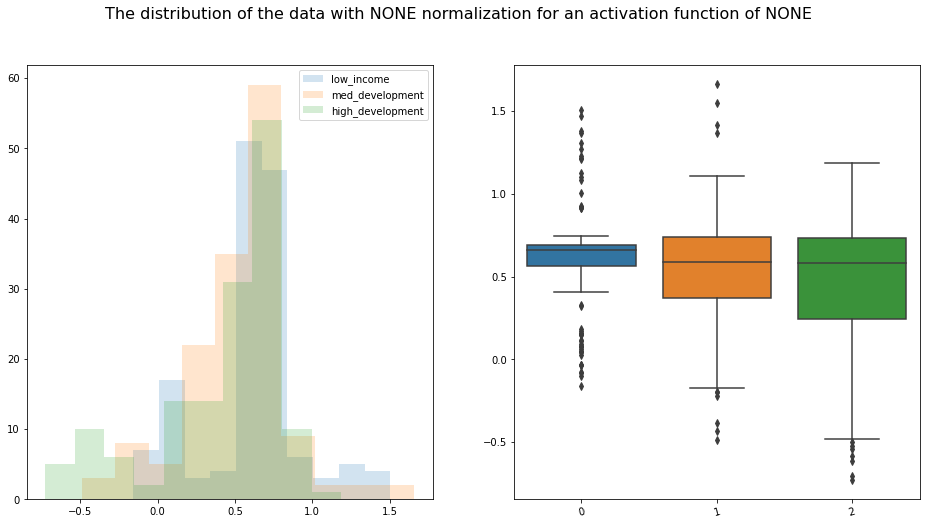

(     low_income  med_development  high_development
 0      0.688411         0.887718          0.589774
 1      0.694503         0.728767          0.757408
 2      0.622078         0.300308          0.309370
 3      0.613444         0.447362          0.767564
 4      0.591967         0.158277          0.340423
 ..          ...              ...               ...
 142    0.488537         0.576493          0.349914
 143   -0.036364         0.196157          0.142340
 144    0.079138         0.275194          0.144476
 145   -0.033333        -0.100909         -0.398691
 146   -0.078583         0.054673         -0.541483
 
 [147 rows x 3 columns],
 array([0.95026285, 1.78837735, 0.43590425]),
 array([-0.09418464, -0.31655465, -1.18462736]))

In [123]:
plotting(df)

In [124]:
df.to_csv('../data/Boston_Housing_Market_Challenge/developments.csv')